In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N40, Olisthesis L5-S1, M, 15 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N10,S,63,F_1003_2.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N21, Olisthesis L5-S1, F, 54 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N25, Olisthesis L4-5, F, 50 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N11, Olisthesis. L4-5, M, 48 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N41,S,54,M_1_0.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N13, Olisthesis L4-5, F, 60 yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N23,S,78,M_1001_0.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N6, Olisthesis L4-5, F, 60 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N14, Olisthesis L4-5, M, 48 Yrs.jpg
/kaggle/input

In [2]:
from PIL import Image
import matplotlib.pyplot as plt


base_path = '/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331'

In [3]:
classes = ['Normal', 'Scol', 'Spond']
image_counts = {}

for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[class_name] = len(image_files)

df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'ImageCount'])

In [4]:
df_counts

,Class,ImageCount
0,Normal,71
1,Scol,185
2,Spond,78


In [5]:
import seaborn as sns

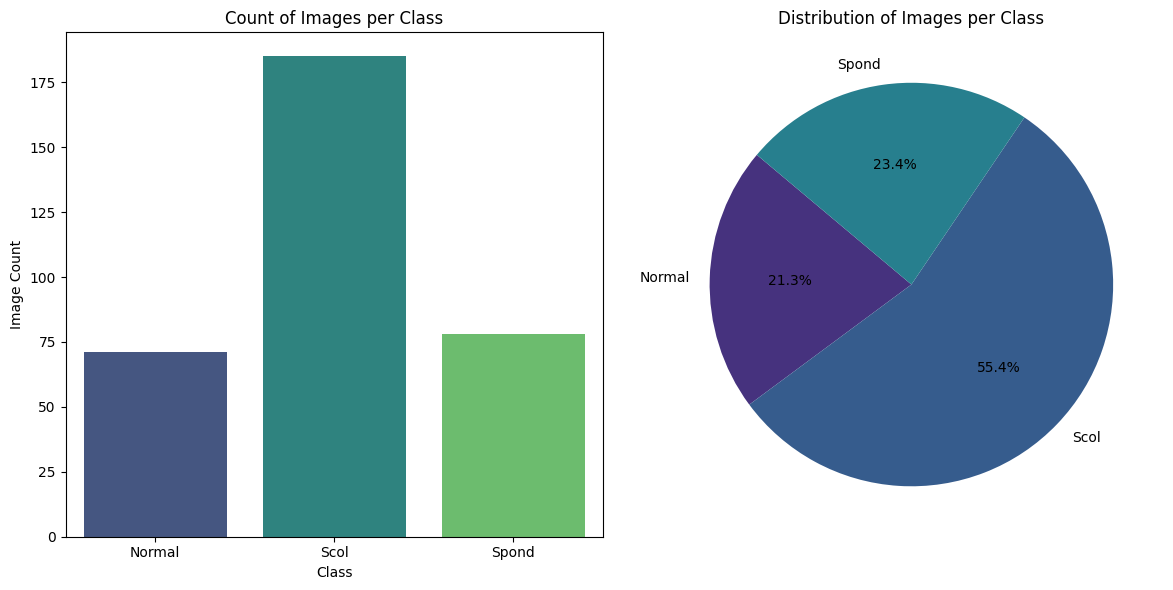

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")
plt.title('Count of Images per Class')
plt.ylabel('Image Count')
plt.xlabel('Class')

plt.subplot(1, 2, 2)
plt.pie(df_counts['ImageCount'], labels=df_counts['Class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Distribution of Images per Class')

plt.tight_layout()
plt.show()

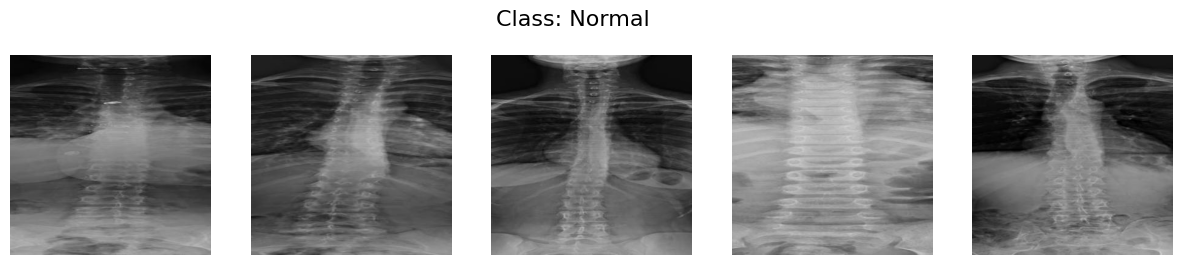

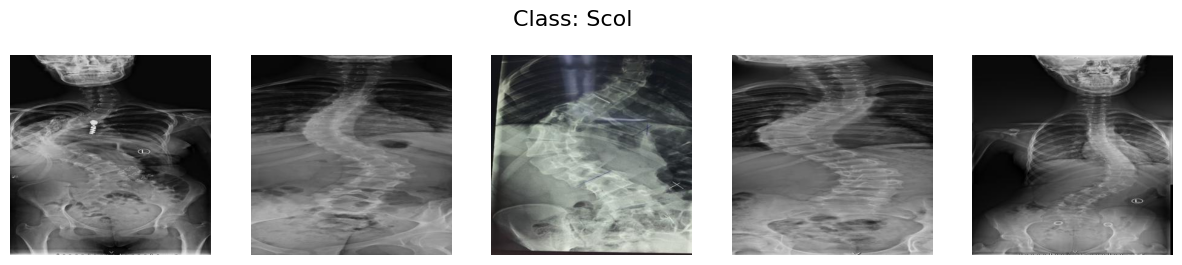

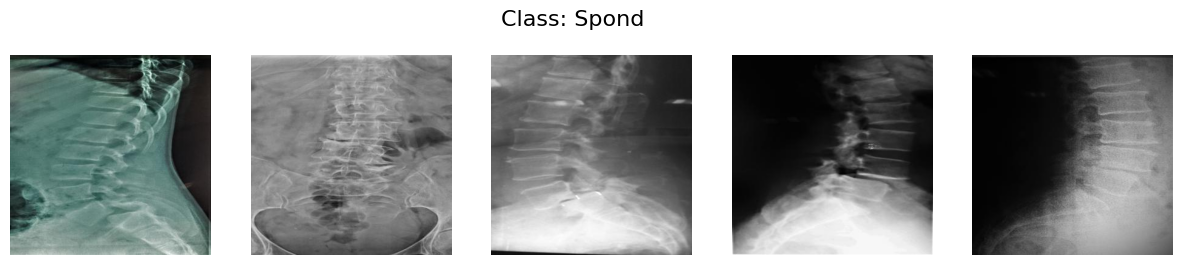

In [7]:
for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:5]  # Get first 5 images
    
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    
    plt.show()

In [8]:
dataset_path = base_path

In [9]:
image_data = []

folders = {'Normal': 1, 'Scol': 2, 'Spond': 3}

for folder_name, label in folders.items():
    folder_path = os.path.join(dataset_path, folder_name)
    
    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)
        
        for image_file in image_files:
            image_data.append((os.path.join(folder_path, image_file), label))
    else:
        print(f"Folder {folder_path} not found.")

df = pd.DataFrame(image_data, columns=['image_path', 'label'])

In [10]:
df.head()

,image_path,label
0,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
1,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
2,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
3,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
4,/kaggle/input/the-vertebrae-xray-images/xkt857...,1


In [11]:
df.tail()

,image_path,label
333,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
334,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
335,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
336,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
337,/kaggle/input/the-vertebrae-xray-images/xkt857...,3


In [12]:
df.shape

(338, 2)

In [13]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  338 non-null    object
 1   label       338 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [17]:
df['label'].unique()

array([1, 2, 3])

In [18]:
df['label'].value_counts()

label
2    188
3     79
1     71
Name: count, dtype: int64

In [19]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [20]:
df['label'] = df['label'].astype(str)

In [21]:
train_df_new, temp_df_new = train_test_split(
    df,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df['label']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label'] 
)

In [22]:
from imblearn.over_sampling import RandomOverSampler

X = train_df_new['image_path'].values.reshape(-1, 1)  
y = train_df_new['label'].values

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

balanced_train_df = pd.DataFrame({
    'image_path': X_resampled.flatten(),
    'label': y_resampled
})

print("Class distribution after oversampling:")
print(balanced_train_df['label'].value_counts())

Class distribution after oversampling:
label
3    150
2    150
1    150
Name: count, dtype: int64


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    balanced_train_df,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 450 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [25]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [27]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1732776912.952104      73 service.cc:145] XLA service 0x7aacdc001410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732776912.952159      73 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732776912.952163      73 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732776923.942594     103 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads

I0000 00:00:1732776935.824679      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


21/29 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.7561 - loss: 0.6741

I0000 00:00:1732776950.304580     142 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



29/29 ━━━━━━━━━━━━━━━━━━━━ 57s 998ms/step - accuracy: 0.7850 - loss: 0.5949 - val_accuracy: 0.7647 - val_loss: 0.8620
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - accuracy: 0.9364 - loss: 0.1793 - val_accuracy: 0.9118 - val_loss: 0.2577
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.9610 - loss: 0.1166 - val_accuracy: 0.8824 - val_loss: 0.2355
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - accuracy: 0.9814 - loss: 0.0627 - val_accuracy: 0.9412 - val_loss: 0.2164
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.9950 - loss: 0.0188 - val_accuracy: 0.9118 - val_loss: 0.2247


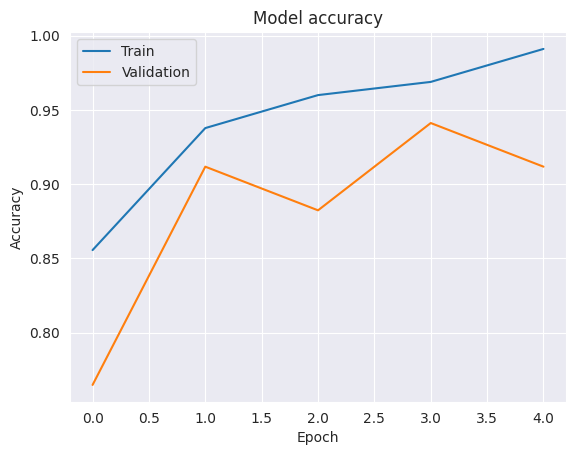

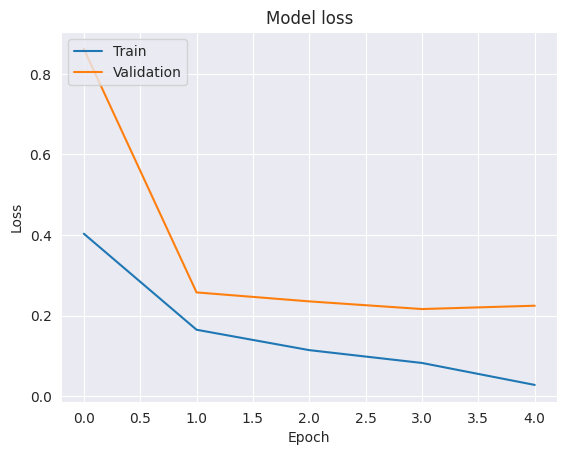

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [31]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.83      0.71      0.77         7
           2       0.90      0.95      0.92        19
           3       0.88      0.88      0.88         8

    accuracy                           0.88        34
   macro avg       0.87      0.85      0.86        34
weighted avg       0.88      0.88      0.88        34



In [32]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

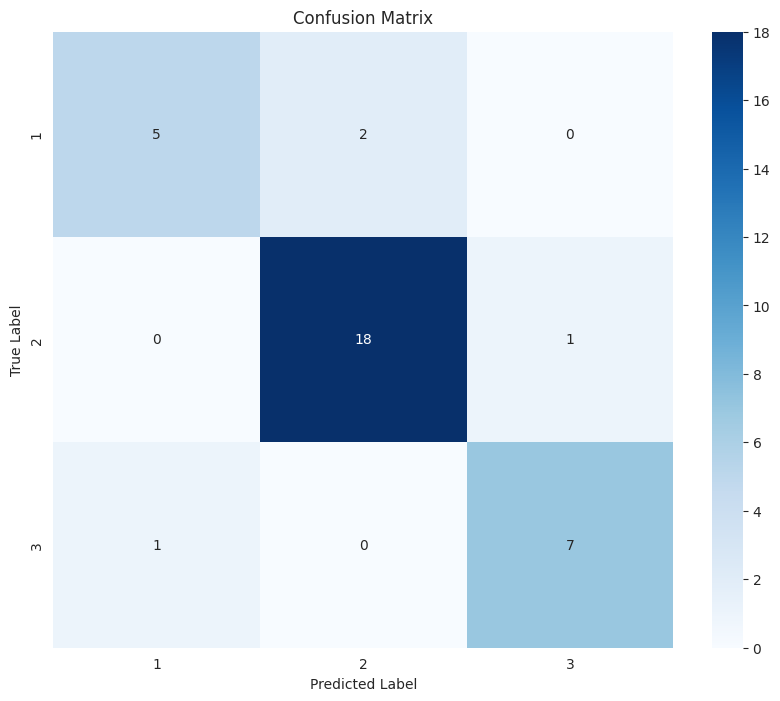

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):
    
    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x) 

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)  

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1732777020.835324     265 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



29/29 ━━━━━━━━━━━━━━━━━━━━ 56s 983ms/step - accuracy: 0.8029 - loss: 0.5856 - val_accuracy: 0.8824 - val_loss: 0.3334
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9806 - loss: 0.0891 - val_accuracy: 0.8235 - val_loss: 0.5926
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9671 - loss: 0.0759 - val_accuracy: 0.9118 - val_loss: 0.2741
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9753 - loss: 0.0789 - val_accuracy: 0.8235 - val_loss: 0.4461
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9571 - loss: 0.1113 - val_accuracy: 0.9412 - val_loss: 0.2482


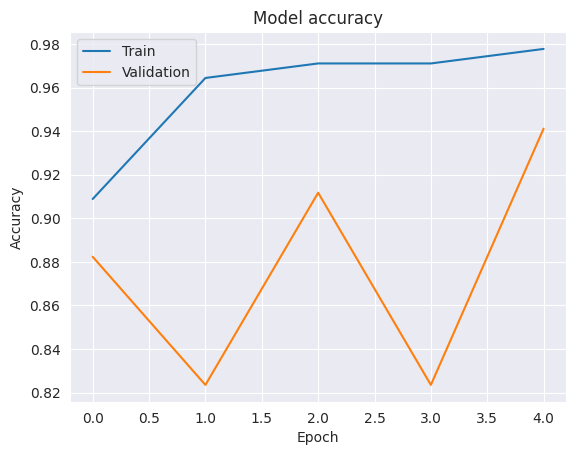

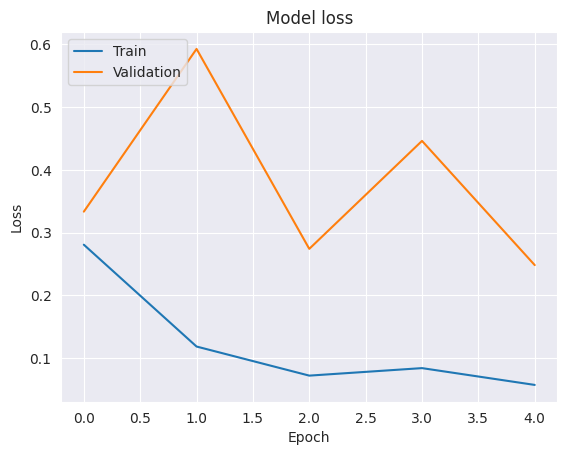

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step


In [38]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       1.00      0.57      0.73         7
           2       0.79      1.00      0.88        19
           3       1.00      0.75      0.86         8

    accuracy                           0.85        34
   macro avg       0.93      0.77      0.82        34
weighted avg       0.88      0.85      0.85        34



In [39]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

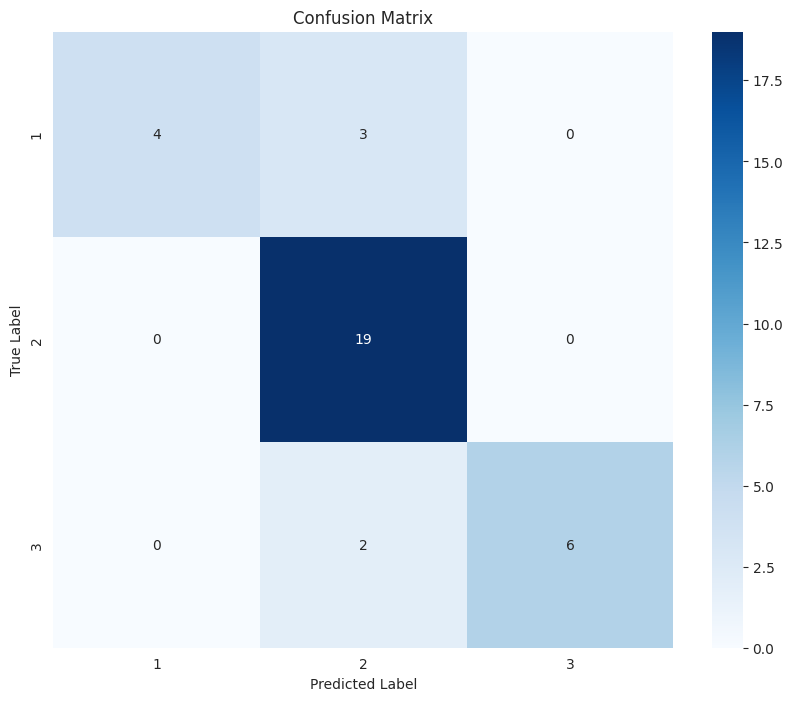

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_densenet_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = DenseNet121(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels))(x)
    
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

input_shape = (224, 224, 3)
densenet_model = create_densenet_model(input_shape)

densenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [42]:
history = densenet_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1732777117.403761     414 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



20/29 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7330 - loss: 0.5933

I0000 00:00:1732777143.436377     448 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



29/29 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7768 - loss: 0.4966 - val_accuracy: 0.6176 - val_loss: 0.6902
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9693 - loss: 0.0947 - val_accuracy: 0.7353 - val_loss: 0.5215
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9968 - loss: 0.0444 - val_accuracy: 0.8235 - val_loss: 0.3989
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9896 - loss: 0.0205 - val_accuracy: 0.9412 - val_loss: 0.2798
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9987 - loss: 0.0104 - val_accuracy: 0.9118 - val_loss: 0.3065


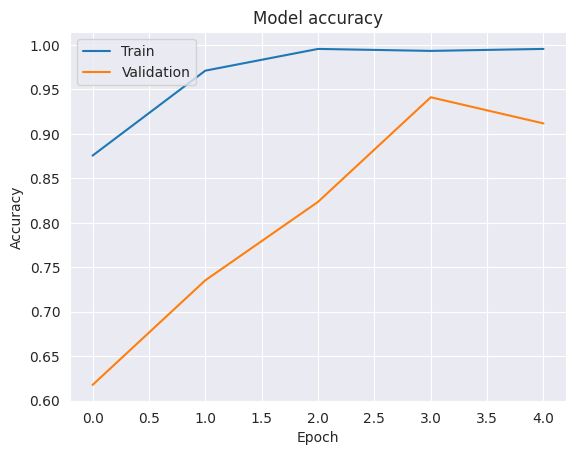

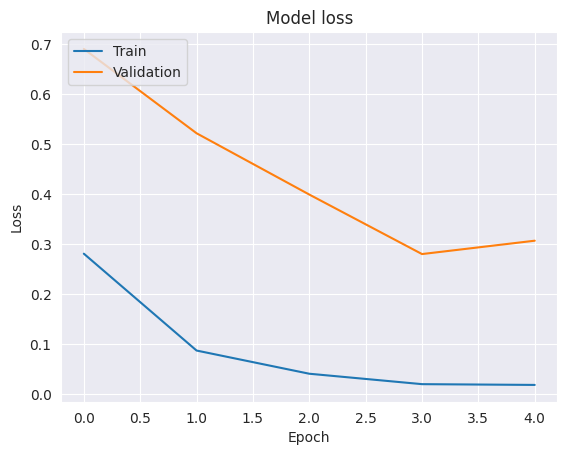

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
test_labels = test_gen_new.classes  
predictions = densenet_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step


In [45]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.59      1.00      0.75        19
           3       1.00      0.25      0.40         8

    accuracy                           0.62        34
   macro avg       0.53      0.42      0.38        34
weighted avg       0.57      0.62      0.51        34



In [46]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

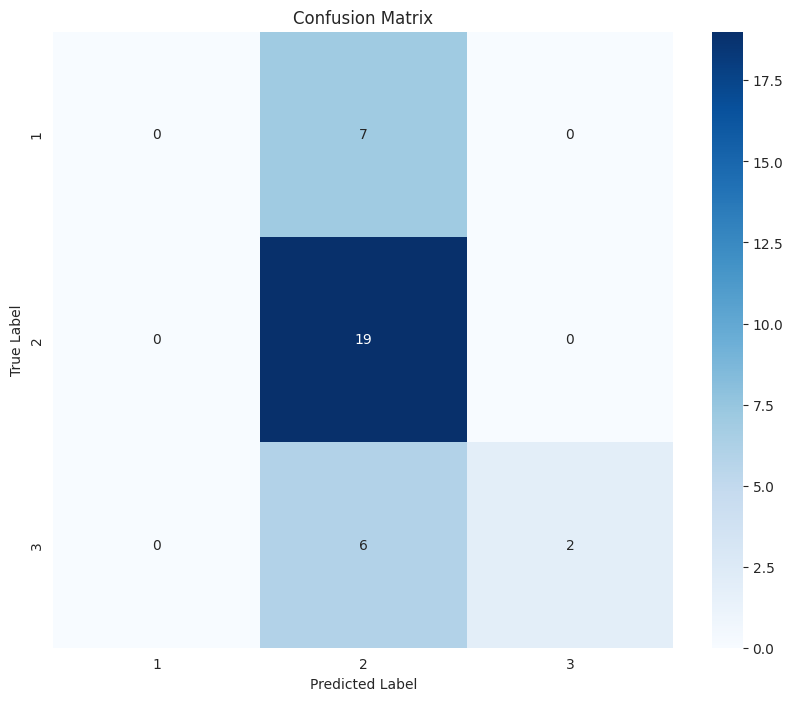

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [48]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [49]:
image_path_new = '/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N1, Olisthesis L5-S1, F, 34 yrs.jpg'

img_size = (224, 224)  
img = load_img(image_path_new, target_size=img_size)  
img_array = img_to_array(img)  
img_array = img_array / 255.0 
img_array = np.expand_dims(img_array, axis=0)  

In [50]:
predictions = densenet_model.predict(img_array)

predicted_class = np.argmax(predictions, axis=-1)  
print(f"Predicted Class: {predicted_class[0]}")

class_indices = train_gen_new.class_indices  
class_labels = {v: k for k, v in class_indices.items()}  
print(f"Predicted Label: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted Class: 1
Predicted Label: 2


# Thanks !!!